In [22]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv("./Data/Data_final/5232movies_imdb.csv", encoding='latin1')
movies

,Title,Year,Runtime,Genre,Rating,Description,Director,Stars,Votes,Img_link
0,Sign of the Lion,1962,103 min,Drama,7.2,A French-American in Paris lives by sponging o...,Éric Rohmer,"Éric Rohmer, Jess Hahn, Michèle Girardon, Van ...",2352.0,https://m.media-amazon.com/images/M/MV5BOGZkMj...
1,Bogowie,2014,120 min,"Biography, Drama",7.6,The early career of cardiac surgeon Zbigniew R...,Lukasz Palkowski,"Lukasz Palkowski, Tomasz Kot, Piotr Glowacki, ...",7704.0,https://m.media-amazon.com/images/M/MV5BMTg2YW...
2,WR: Mysteries of the Organism,1971,84 min,"Comedy, Drama, Fantasy",6.7,An homage to the work of psychologist Wilhelm ...,Dusan Makavejev,"Dusan Makavejev, Milena Dravic, Ivica Vidovic,...",5423.0,https://m.media-amazon.com/images/M/MV5BOTgyYW...
3,Macross Plus Movie Edition,1995,115 min,"Animation, Action, Drama",7.5,Two rival test pilots strive to be the best th...,Shôji Kawamori,"Shôji Kawamori, Yûji Moriyama, Shin'ichirô Wat...",689.0,https://m.media-amazon.com/images/M/MV5BODE5MD...
4,Visions of Light,1992,92 min,"Documentary, History",7.7,Cameramen and women discuss the craft and art ...,Arnold Glassman,"Arnold Glassman, Todd McCarthy, Stuart Samuels...",3336.0,https://m.media-amazon.com/images/M/MV5BMTIwNj...
...,...,...,...,...,...,...,...,...,...,...
5229,Arthur the King,2024,107 min,"Adventure, Drama",7.0,An adventure racer adopts a stray dog named Ar...,Simon Cellan Jones,"Simon Cellan Jones, Mark Wahlberg, Simu Liu, J...",9165.0,https://m.media-amazon.com/images/M/MV5BNzMzMD...
5230,Boy Kills World,2023,111 min,"Action, Crime, Thriller",6.8,"A fever dream action film that follows Boy, a ...",Moritz Mohr,"Moritz Mohr, Bill Skarsgård, Jessica Rothe, Mi...",3014.0,https://m.media-amazon.com/images/M/MV5BNmYyM2...
5231,Tuyen Dep Trai,2025,119 min,Drama,10.0,A story about a duck named duck,Tuyen,NaN,NaN,https://scontent.fhan18-1.fna.fbcdn.net/v/t39....
5232,Quoc Beautiful,2025,99,Action,8.0,Duck Goose Duck,Quoc,NaN,NaN,https://scontent.fhan18-1.fna.fbcdn.net/v/t1.6...


In [23]:
movies = movies.drop_duplicates(subset=['Title'])
movies = movies.reset_index(drop=True)
movies['Year'] = movies['Year'].str.extract(r'(\d{4})')
movies['Year'] = movies['Year'].astype(int)

movies['Runtime'] = movies['Runtime'].str.replace(' min', '').str.replace(',', '').astype(float).astype('Int64')
movies['Genre'] = movies['Genre'].fillna('')
genre_split = movies['Genre'].str.split(', ', expand=True)
genre_split.columns = ['Genre1', 'Genre2', 'Genre3']
movies = pd.concat([movies, genre_split], axis=1)
temp_df = movies['Stars'].str.split(', ', expand=True)
movies['Stars1'] = temp_df[0]
movies['Stars2'] = temp_df[1]
movies['Stars3'] = temp_df[2]

movies_use = movies[['Title', 'Year', 'Runtime', 'Genre1', 'Genre2', 'Genre3', 'Stars1', 'Stars2', 'Stars3', 'Description', 'Rating', 'Votes', 'Img_link']]
movies_use

,Title,Year,Runtime,Genre1,Genre2,Genre3,Stars1,Stars2,Stars3,Description,Rating,Votes,Img_link
0,Sign of the Lion,1962,103,Drama,None,None,Éric Rohmer,Jess Hahn,Michèle Girardon,A French-American in Paris lives by sponging o...,7.2,2352.0,https://m.media-amazon.com/images/M/MV5BOGZkMj...
1,Bogowie,2014,120,Biography,Drama,None,Lukasz Palkowski,Tomasz Kot,Piotr Glowacki,The early career of cardiac surgeon Zbigniew R...,7.6,7704.0,https://m.media-amazon.com/images/M/MV5BMTg2YW...
2,WR: Mysteries of the Organism,1971,84,Comedy,Drama,Fantasy,Dusan Makavejev,Milena Dravic,Ivica Vidovic,An homage to the work of psychologist Wilhelm ...,6.7,5423.0,https://m.media-amazon.com/images/M/MV5BOTgyYW...
3,Macross Plus Movie Edition,1995,115,Animation,Action,Drama,Shôji Kawamori,Yûji Moriyama,Shin'ichirô Watanabe,Two rival test pilots strive to be the best th...,7.5,689.0,https://m.media-amazon.com/images/M/MV5BODE5MD...
4,Visions of Light,1992,92,Documentary,History,None,Arnold Glassman,Todd McCarthy,Stuart Samuels,Cameramen and women discuss the craft and art ...,7.7,3336.0,https://m.media-amazon.com/images/M/MV5BMTIwNj...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Arthur the King,2024,107,Adventure,Drama,None,Simon Cellan Jones,Mark Wahlberg,Simu Liu,An adventure racer adopts a stray dog named Ar...,7.0,9165.0,https://m.media-amazon.com/images/M/MV5BNzMzMD...
5140,Boy Kills World,2023,111,Action,Crime,Thriller,Moritz Mohr,Bill Skarsgård,Jessica Rothe,"A fever dream action film that follows Boy, a ...",6.8,3014.0,https://m.media-amazon.com/images/M/MV5BNmYyM2...
5141,Tuyen Dep Trai,2025,119,Drama,None,None,NaN,NaN,NaN,A story about a duck named duck,10.0,NaN,https://scontent.fhan18-1.fna.fbcdn.net/v/t39....
5142,Quoc Beautiful,2025,99,Action,None,None,NaN,NaN,NaN,Duck Goose Duck,8.0,NaN,https://scontent.fhan18-1.fna.fbcdn.net/v/t1.6...


C:\Users\khenh\AppData\Local\Temp\ipykernel_25308\3986194322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=movies, x='Year', palette='viridis')


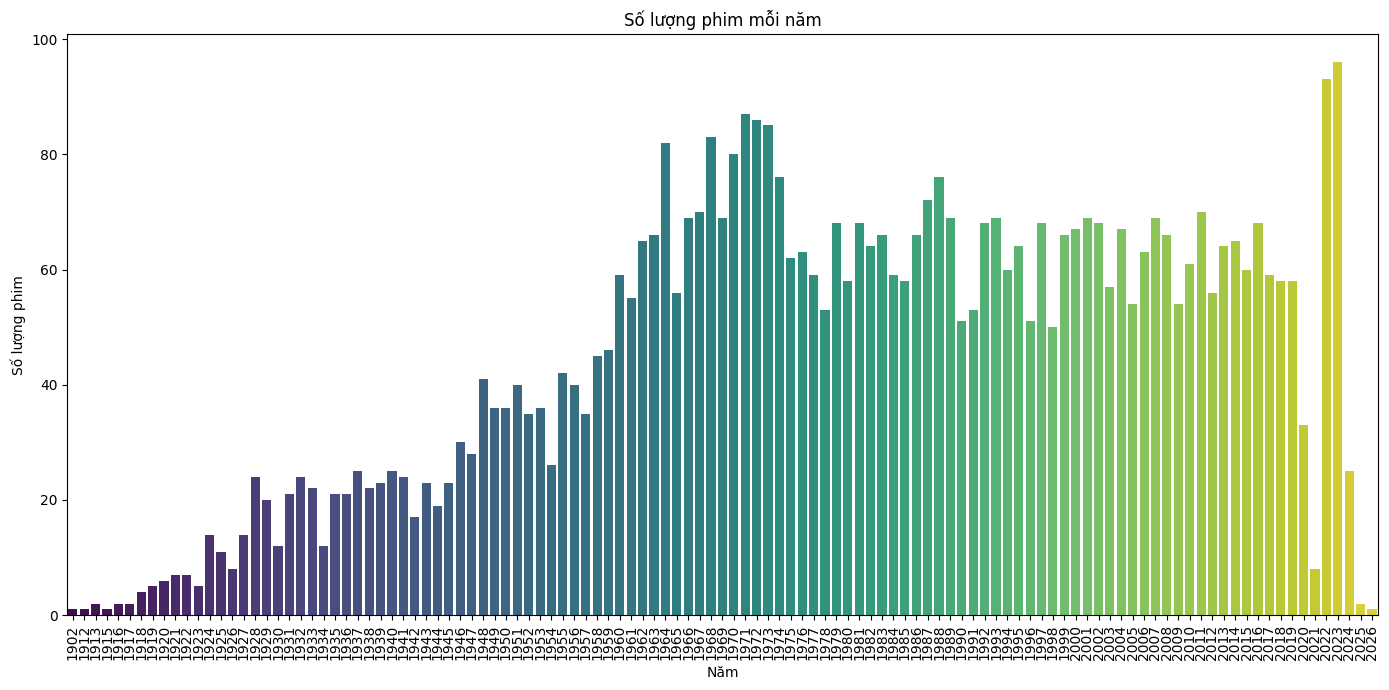

In [24]:
# Vẽ biểu đồ thống kê số lượng phim mỗi năm
plt.figure(figsize=(14, 7))
sns.countplot(data=movies, x='Year', palette='viridis')
plt.title('Số lượng phim mỗi năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng phim')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\khenh\AppData\Local\Temp\ipykernel_25308\2194994017.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=genres, order=genres.value_counts().index, palette='viridis')


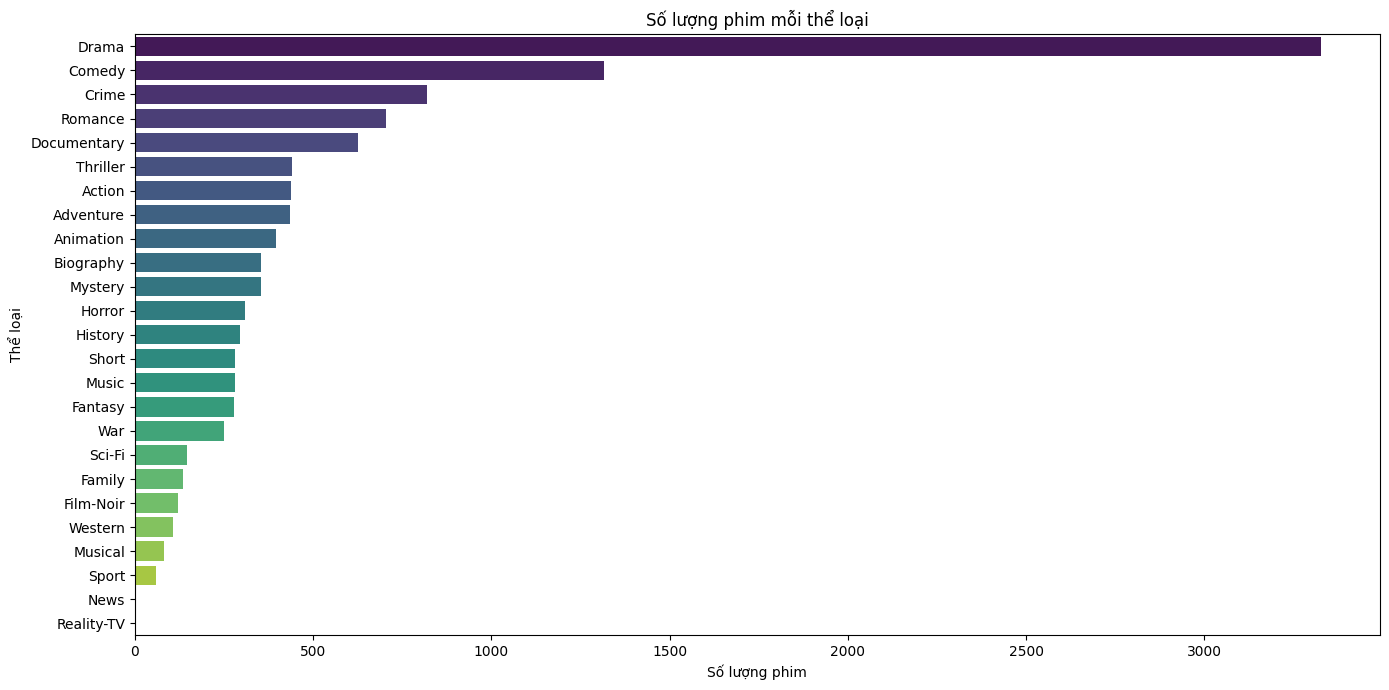

In [25]:
# Vẽ biểu đồ thống kê số lượng phim mỗi thể loại
plt.figure(figsize=(14, 7))
genres = pd.concat([movies['Genre1'], movies['Genre2'], movies['Genre3']])
genres = genres[genres != ''].reset_index(drop=True)  # Loại bỏ các giá trị rỗng
sns.countplot(y=genres, order=genres.value_counts().index, palette='viridis')
plt.title('Số lượng phim mỗi thể loại')
plt.xlabel('Số lượng phim')
plt.ylabel('Thể loại')
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np

# Constants
num_users = 1000
num_movies = 5230
min_votes_per_user = 50
max_votes_per_user = 150

# Generating random data
np.random.seed(42)
user_ids = np.arange(1, num_users + 1)
movie_ids = np.arange(1, num_movies + 1)
ratings = [1, 2, 3, 4, 5]

data = []

for user_id in user_ids:
    num_votes = np.random.randint(min_votes_per_user, max_votes_per_user + 1)
    movies_voted = np.random.choice(movie_ids, num_votes, replace=False)
    
    for movie_id in movies_voted:
        rating = np.random.choice(ratings, p=[0.15, 0.15, 0.15, 0.15, 0.40])
        data.append([user_id, movie_id, rating])

# Creating DataFrame
df = pd.DataFrame(data, columns=['UserID', 'MovieID', 'Rating'])

# Saving to CSV
file_path = 'user_movie_ratings.csv'
df.to_csv(file_path, index=False)

import pandas as pd
import numpy as np

# Đọc dữ liệu từ file CSV đã tạo
df = pd.read_csv('./user_movie_ratings.csv')

# Đảo lộn vị trí các hàng trong DataFrame
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Lưu lại dữ liệu đã thay đổi
shuffled_file_path = './user_movie_ratings_shuffled_rows.csv'
df_shuffled.to_csv(shuffled_file_path, index=False)

shuffled_file_path



'./user_movie_ratings_shuffled_rows.csv'

: 